# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
city_list = []
country = []
temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []
date = []
index_counter = 0
set_counter = 1

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [20]:
print("Start data retrieval")
print("------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if index_counter > 49:
        index_counter = 0
        set_counter += 1
    else:
        index_counter +=1 
    print (f"Processing city number {index_counter} set {set_counter} - {city}")
    
    try:
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        city_list.append(city)
    except:
        print("City not found")
        
print("-------------------")
print("Data retrieval complete")

Start data retrieval
------------------
Processing city number 1 set 1 - punta arenas
Processing city number 2 set 1 - pangnirtung
Processing city number 3 set 1 - touros
Processing city number 4 set 1 - east london
Processing city number 5 set 1 - jamestown
Processing city number 6 set 1 - busselton
Processing city number 7 set 1 - hilo
Processing city number 8 set 1 - umm lajj
Processing city number 9 set 1 - saint george
Processing city number 10 set 1 - port elizabeth
Processing city number 11 set 1 - atuona
Processing city number 12 set 1 - rikitea
Processing city number 13 set 1 - santa lucia
Processing city number 14 set 1 - tsihombe
City not found
Processing city number 15 set 1 - vaini
Processing city number 16 set 1 - kirakira
Processing city number 17 set 1 - tuatapere
Processing city number 18 set 1 - hermanus
Processing city number 19 set 1 - avarua
Processing city number 20 set 1 - wasilla
Processing city number 21 set 1 - new norfolk
Processing city number 22 set 1 - lon

Processing city number 29 set 4 - toliary
City not found
Processing city number 30 set 4 - maldonado
Processing city number 31 set 4 - seoul
Processing city number 32 set 4 - bismarck
Processing city number 33 set 4 - arlit
Processing city number 34 set 4 - samusu
City not found
Processing city number 35 set 4 - menongue
Processing city number 36 set 4 - namibe
Processing city number 37 set 4 - soyo
Processing city number 38 set 4 - ahipara
Processing city number 39 set 4 - inirida
Processing city number 40 set 4 - coquimbo
Processing city number 41 set 4 - karkaralinsk
City not found
Processing city number 42 set 4 - mount gambier
Processing city number 43 set 4 - libreville
Processing city number 44 set 4 - fasa
Processing city number 45 set 4 - cape town
Processing city number 46 set 4 - slyudyanka
Processing city number 47 set 4 - puerto madryn
Processing city number 48 set 4 - la ronge
Processing city number 49 set 4 - meyungs
City not found
Processing city number 50 set 4 - erenh

Processing city number 12 set 8 - nalut
Processing city number 13 set 8 - muros
Processing city number 14 set 8 - los llanos de aridane
Processing city number 15 set 8 - marshall
Processing city number 16 set 8 - abu dhabi
Processing city number 17 set 8 - merrill
Processing city number 18 set 8 - chit baragaon
City not found
Processing city number 19 set 8 - bathsheba
Processing city number 20 set 8 - vila velha
Processing city number 21 set 8 - krasnyy chikoy
Processing city number 22 set 8 - half moon bay
Processing city number 23 set 8 - lokoja
Processing city number 24 set 8 - la grande
Processing city number 25 set 8 - yazd
Processing city number 26 set 8 - prince george
Processing city number 27 set 8 - khandbari
Processing city number 28 set 8 - auki
Processing city number 29 set 8 - ossora
Processing city number 30 set 8 - sao joao da barra
Processing city number 31 set 8 - superior
Processing city number 32 set 8 - santa cruz del sur
Processing city number 33 set 8 - villiers

Processing city number 42 set 11 - rio cuarto
Processing city number 43 set 11 - svetlaya
Processing city number 44 set 11 - sitka
Processing city number 45 set 11 - annau
Processing city number 46 set 11 - borogontsy
Processing city number 47 set 11 - nieves
Processing city number 48 set 11 - lujan
Processing city number 49 set 11 - maroantsetra
Processing city number 50 set 11 - sinnamary
Processing city number 0 set 12 - mehamn
Processing city number 1 set 12 - quatre cocos
Processing city number 2 set 12 - burica
City not found
Processing city number 3 set 12 - codrington
Processing city number 4 set 12 - one hundred mile house
City not found
Processing city number 5 set 12 - porto velho
Processing city number 6 set 12 - hervey bay
Processing city number 7 set 12 - zihuatanejo
Processing city number 8 set 12 - garowe
Processing city number 9 set 12 - lorengau
Processing city number 10 set 12 - shizunai
Processing city number 11 set 12 - ust-kamchatsk
City not found
Processing city 

In [158]:

# print(len(city_list))   
# print(len(country)) 
# print(len(temp)) 
# print(len(humidity)) 
# print(len(wind_speed)) 
# print(len(clouds)) 
# print(len(latitude)) 
# print(len(longitude))


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
 city_data = pd.DataFrame({"City":city_list,
                          "Country": country,
                          "Date":date,
                          "Max Temp (F)":temp,
                          "Humidity (%)":humidity,
                          "Wind Speed":wind_speed, 
                          "Cloudiness (%)": clouds,
                          "Latitude":latitude,
                          "Longitude":longitude})
city_data.head()

,City,Country,Date,Max Temp (F),Humidity (%),Wind Speed,Cloudiness (%),Latitude,Longitude
0,punta arenas,CL,1603909327,51.80,37,36.91,40,-53.15,-70.92
1,pangnirtung,CA,1603909391,19.40,57,2.66,90,66.15,-65.71
2,touros,BR,1603909391,84.20,62,19.46,75,-5.20,-35.46
3,east london,ZA,1603909391,69.80,88,5.82,75,-33.02,27.91
4,jamestown,US,1603909391,48.99,87,10.29,90,42.10,-79.24


In [51]:
city_data.count()

City              531
Country           531
Date              531
Max Temp (F)      531
Humidity (%)      531
Wind Speed        531
Cloudiness (%)    531
Latitude          531
Longitude         531
dtype: int64

In [52]:
city_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
humidity_df = city_data.loc[city_data["Humidity (%)"]>100,:]
humidity_df.count()

City              0
Country           0
Date              0
Max Temp (F)      0
Humidity (%)      0
Wind Speed        0
Cloudiness (%)    0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

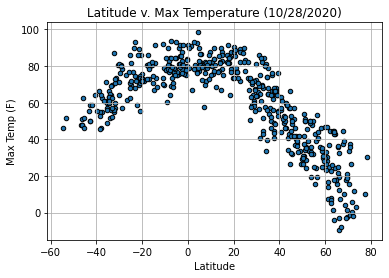

In [64]:
city_data.plot(kind="scatter",x="Latitude", y="Max Temp (F)",edgecolor="black",title="Latitude v. Max Temperature (10/28/2020)",grid=True)
plt.savefig("output_data/LatvTemp.png")
plt.show()

## Latitude vs. Humidity Plot

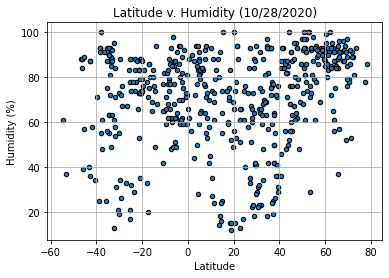

In [65]:
city_data.plot(kind="scatter",x="Latitude", y="Humidity (%)",edgecolor="black",title="Latitude v. Humidity (10/28/2020)",grid=True)
plt.savefig("output_data/LatvHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

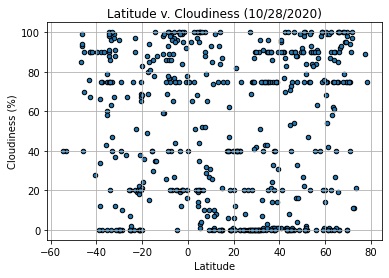

In [66]:
city_data.plot(kind="scatter",x="Latitude", y="Cloudiness (%)",edgecolor="black",title="Latitude v. Cloudiness (10/28/2020)",grid=True)
plt.savefig("output_data/LatvCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

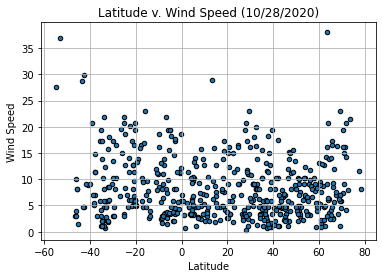

In [67]:
city_data.plot(kind="scatter",x="Latitude", y="Wind Speed",edgecolor="black",title="Latitude v. Wind Speed (10/28/2020)",grid=True)
plt.savefig("output_data/LatvWindspeed.png")
plt.show()

## Linear Regression

In [93]:
northern_hemi_df = city_data.loc[city_data["Latitude"]>= 0,:]
northern_hemi_df["Latitude"].count()

348

In [77]:
southern_hemi_df = city_data.loc[city_data["Latitude"]< 0,:]
southern_hemi_df["Latitude"].count()

183

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [164]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

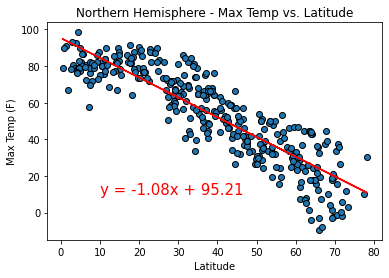

The correlation coefficient is -0.88, suggesting there is a strong negative relationship 


In [169]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq,(10,10),color="r",fontsize=15)
plt.savefig("output_data/NHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a strong negative relationship ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [170]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

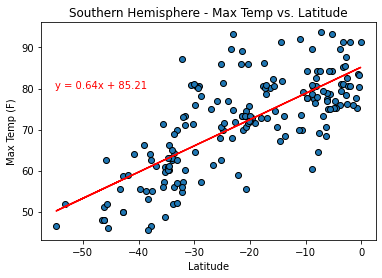

The correlation coefficient is 0.75, suggesting there is a moderate-strong positive relationship 


In [173]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq, (-55,80),color="r")
plt.savefig("output_data/SHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a moderate-strong positive relationship ")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [174]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])[0],2)
eq = eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

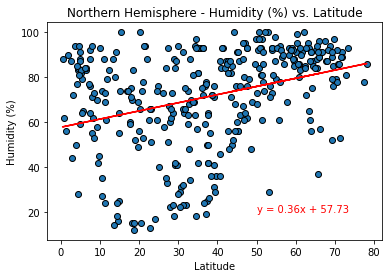

The correlation coefficient is 0.33, suggesting there is a weak positive relationship 


In [178]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq, (50,20),color="r")
plt.savefig("output_data/NHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [179]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

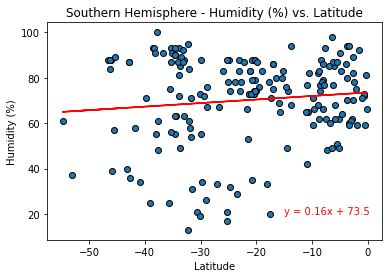

The correlation coefficient is 0.11, suggesting there is a weak positive relationship 


In [181]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq,(-15,20),color="r")
plt.savefig("output_data/SHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [182]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

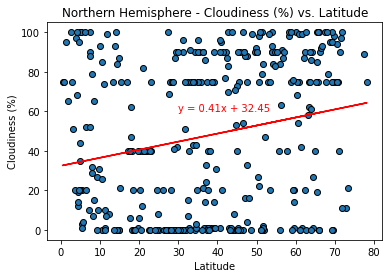

The correlation coefficient is 0.21, suggesting there is a weak positive relationship 


In [185]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq, (30,60),color="r")
plt.savefig("output_data/NHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [186]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

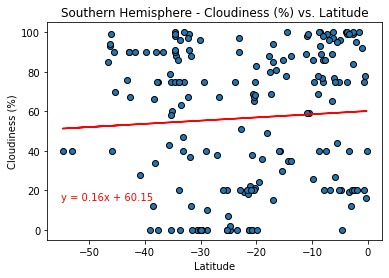

The correlation coefficient is 0.06, suggesting there is a minimal positive relationship 


In [189]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq,(-55,15),color='r')
plt.savefig("output_data/SHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a minimal positive relationship ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [190]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

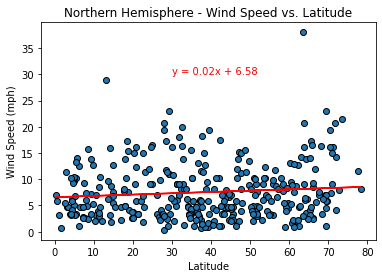

The correlation coefficient is 0.1, suggesting there is a weak positive relationship 


In [192]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(30,30),color="r")
plt.savefig("output_data/NHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [193]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

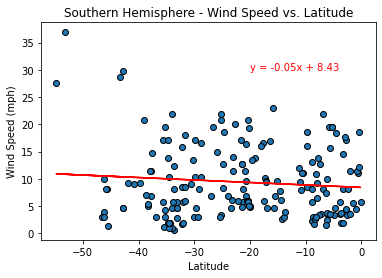

The correlation coefficient is -0.09, suggesting there is a weak negative relationship 


In [194]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(-20,30),color="r")
plt.savefig("output_data/SHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak negative relationship ")